## This version of program does the following
- dil_iter = 15
- x_buffer = 30 and y_buffer =10

In [6]:
import cv2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import importlib
import sys

In [62]:
#all pages within this direct path should have the same marginalia side (left = even number file, right = odd number file)
dirpath = '/Users/hanna/OneDrive/Documents/Professional/OTB/marginalia removal manual pages'
content = os.listdir(dirpath)     

In [63]:
# Read the contents of the volume
ints = list(range(0, len(content)))
content = [content[i] for i in ints]
content.sort()
print(content)

['024.jpg']


In [64]:
fType = 'jpg'
im_sample = [dirpath+'/'+ x for x in content if fType in x]
print(im_sample)

['/Users/hanna/OneDrive/Documents/Professional/OTB/marginalia removal manual pages/024.jpg']


# Simple way --- working

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

# some default right-side and left-side coordinates are given below
# the code determines which to use based on the file name of the first file in the im_sample list
# after running a batch, comment initial values out and adjust as needed
if int(im_sample[0][-7:-4])%2==0:
    #left-side marginalia
    x1= 340
    y1= 180
    x2 = 1600
    y2 = 2450
else:
    #right side marginalia
    x1= 0
    y1= 180
    x2 = 1250
    y2 = 2450


def crop(im_sample):
    imgs_dict = {}
    for i in im_sample:
        img = cv2.imread(i)
        imgs_dict[i] = {
            'path': i,
            'bbox_x1': x1,
            'bbox_y1': y1, 
            'bbox_x2': x2,
            'bbox_y2': y2,
        }
        crop = img[y1:y2, x1:x2]
        f, ax = plt.subplots(1,2, figsize=(20,15)) 
        ax[0].imshow(img)
        ax[1].imshow(crop)
        plt.show()
    
    return imgs_dict

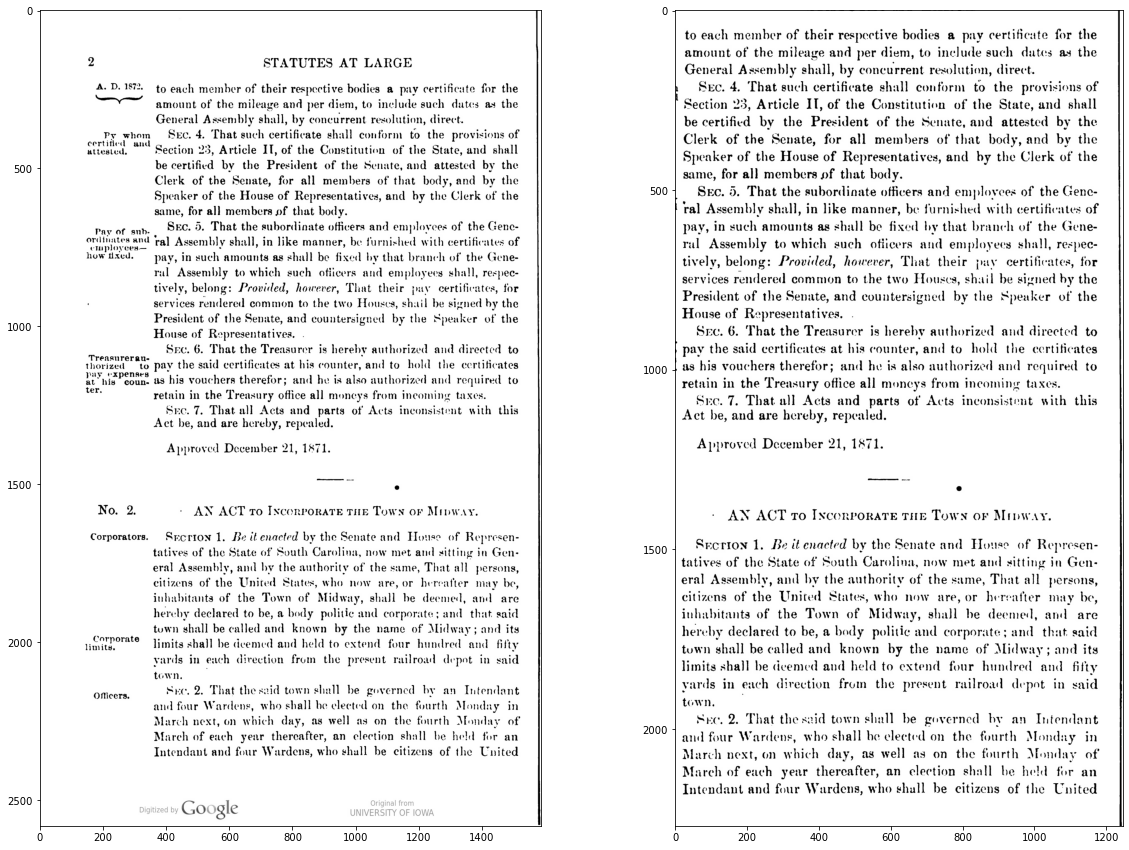

In [76]:
imgs = crop(im_sample)
imgs_df = pd.DataFrame.from_dict(imgs, orient="index")
#uncomment this and run once batch's bounding box is correct
#imgs_df.to_csv(f"./sample_csv.csv", index_label=False)

# simple way --- ended